In [1]:
import graphviz as gv
import random
import heapq
import math

from upc import showG

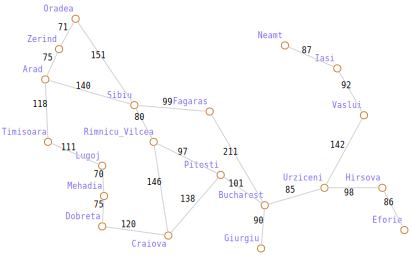

In [3]:
with open('cities.txt') as f:
    city2idx = {}
    cities = []
    coords = []
    n = 0
    for line in f:
        city, x, y = line.strip().split()
        city2idx[city] = n
        cities.append(city)
        coords.append((float(x)/50, float(y)/50))
        n += 1

with open('heuristics.txt') as f:
    heuristics = [0]*n
    for line in f:
        city, hi = line.strip().split()
        heuristics[city2idx[city]] = int(hi)

with open('citiesGraph.txt') as f:
    G = [[] for _ in range(n)]
    for line in f:
        u, v, w = line.strip().split()
        w = int(w)
        G[city2idx[u]].append((city2idx[v], w))
        G[city2idx[v]].append((city2idx[u], w))

showG(G, weighted=True, labels=cities, coords=coords, layout='neato', xlabels=True)

In [4]:
def dijkstra(G, s, t):
    n = len(G)
    visited = [False]*n
    path = [-1]*n
    g = [math.inf]*n
    q = []
    heapq.heappush(q, (0, s))
    g[s] = 0

    while q:
        _, u = heapq.heappop(q)
        if visited[u]:
            continue
        visited[u] = True
        if u == t:
            break
        for v, w in G[u]:
            if not visited[v] and g[u] + w < g[v]:
                g[v] = g[u] + w
                path[v] = u
                heapq.heappush(q, (g[v], v))

    return path, g

In [5]:
def astar(G, s, t, h): # A*
    n = len(G)
    visited = [False]*n
    path = [-1]*n
    g = [math.inf]*n
    q = []
    f = lambda u: g[u] + h[u]
    heapq.heappush(q, (f(s), s))
    g[s] = 0

    while q:
        _, u = heapq.heappop(q)
        if visited[u]:
            continuea
        visited[u] = True
        if u == t:
            break
        for v, w in G[u]:
            if not visited[v] and g[u] + w < g[v]:
                g[v] = g[u] + w
                path[v] = u
                heapq.heappush(q, (f(v), v))

    return path, g

[-1, 13, 14, -1, -1, 15, -1, -1, -1, -1, -1, -1, 15, 14, 15, 0, 0, -1, -1, 0] [0, 418, 366, inf, inf, 239, inf, inf, inf, inf, inf, inf, 291, 317, 220, 140, 118, inf, inf, 75]


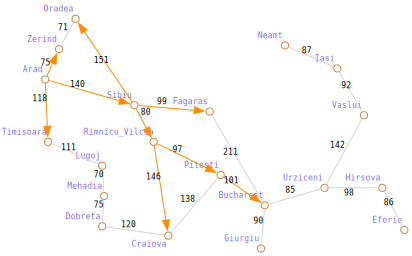

In [6]:
path, cost = astar(G, city2idx['Arad'], city2idx['Bucharest'], heuristics)
print(path, cost)
showG(G, weighted=True, labels=cities, coords=coords, path=path, layout='neato',
      xlabels=True)

[-1, 13, 14, 10, -1, 15, -1, -1, -1, 16, 9, -1, 19, 14, 15, 0, 0, -1, -1, 0] [0, 418, 366, 374, inf, 239, inf, inf, inf, 229, 299, inf, 146, 317, 220, 140, 118, inf, inf, 75]


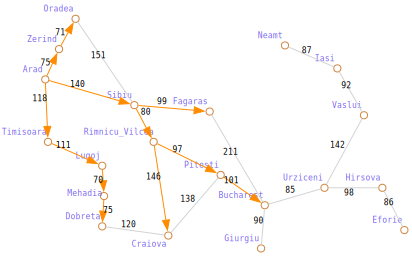

In [7]:
path, cost = dijkstra(G, city2idx['Arad'], city2idx['Bucharest'])
print(path, cost)
showG(G, weighted=True, labels=cities, coords=coords, path=path, layout='neato',
      xlabels=True)